# Parameter Analysis for Waste Water Re-use

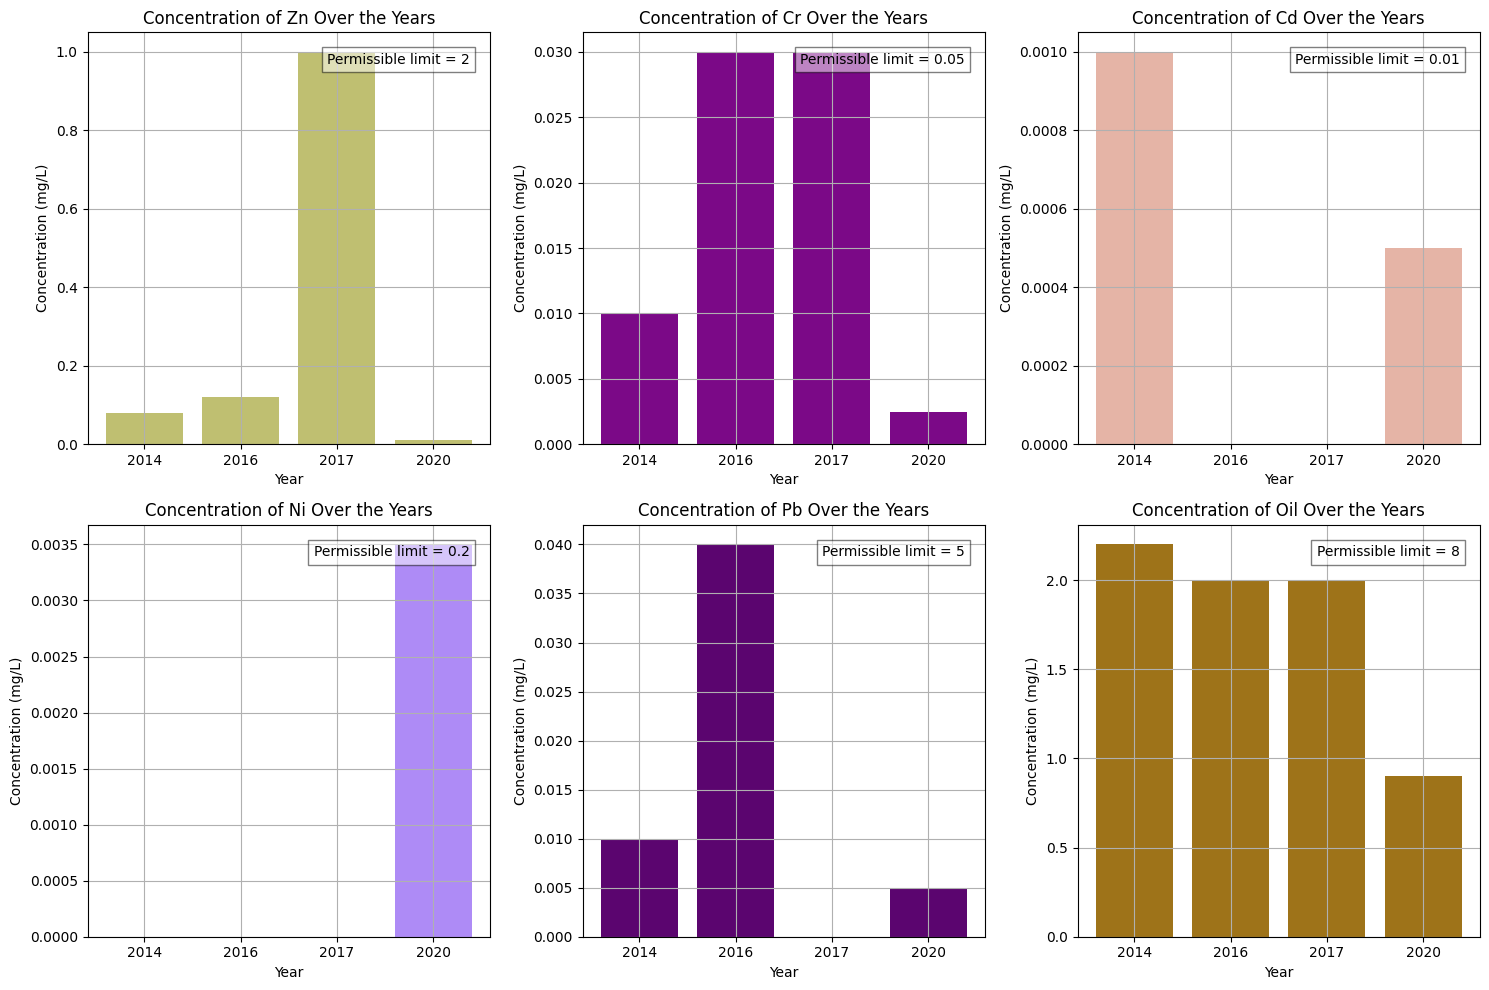

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymannkendall as mk
import pandas as pd

df = pd.read_csv("Data/musi_river.csv")
parameters_to_plot = ["Zn", "Cr", "Cd", "Ni", "Pb", "Oil"]
permissible_limits = {
    "Zn": 2,
    "Cr": 0.05,
    "Cd": 0.01,
    "Ni": 0.2,
    "Pb": 5,
    "Oil": 8

}
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, param in enumerate(parameters_to_plot):
    ax = axs[i]
    color = np.random.rand(3,)  # Generating a random color
    ax.bar(df.columns[1:], df.loc[df['Parameters'] == param].values[0][1:], color=color)
    # ax.bar(df.columns[1:], df.loc[df['Parameters'] == param].values[0][1:], color='skyblue')
    ax.set_title(f'Concentration of {param} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Concentration (mg/L)')
    ax.set_xticks(df.columns[1:])
    ax.grid(True)
    permissible_limit = permissible_limits[param]
    ax.text(0.95, 0.95, f'Permissible limit = {permissible_limit}', 
            transform=ax.transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

for ax in axs[len(parameters_to_plot):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

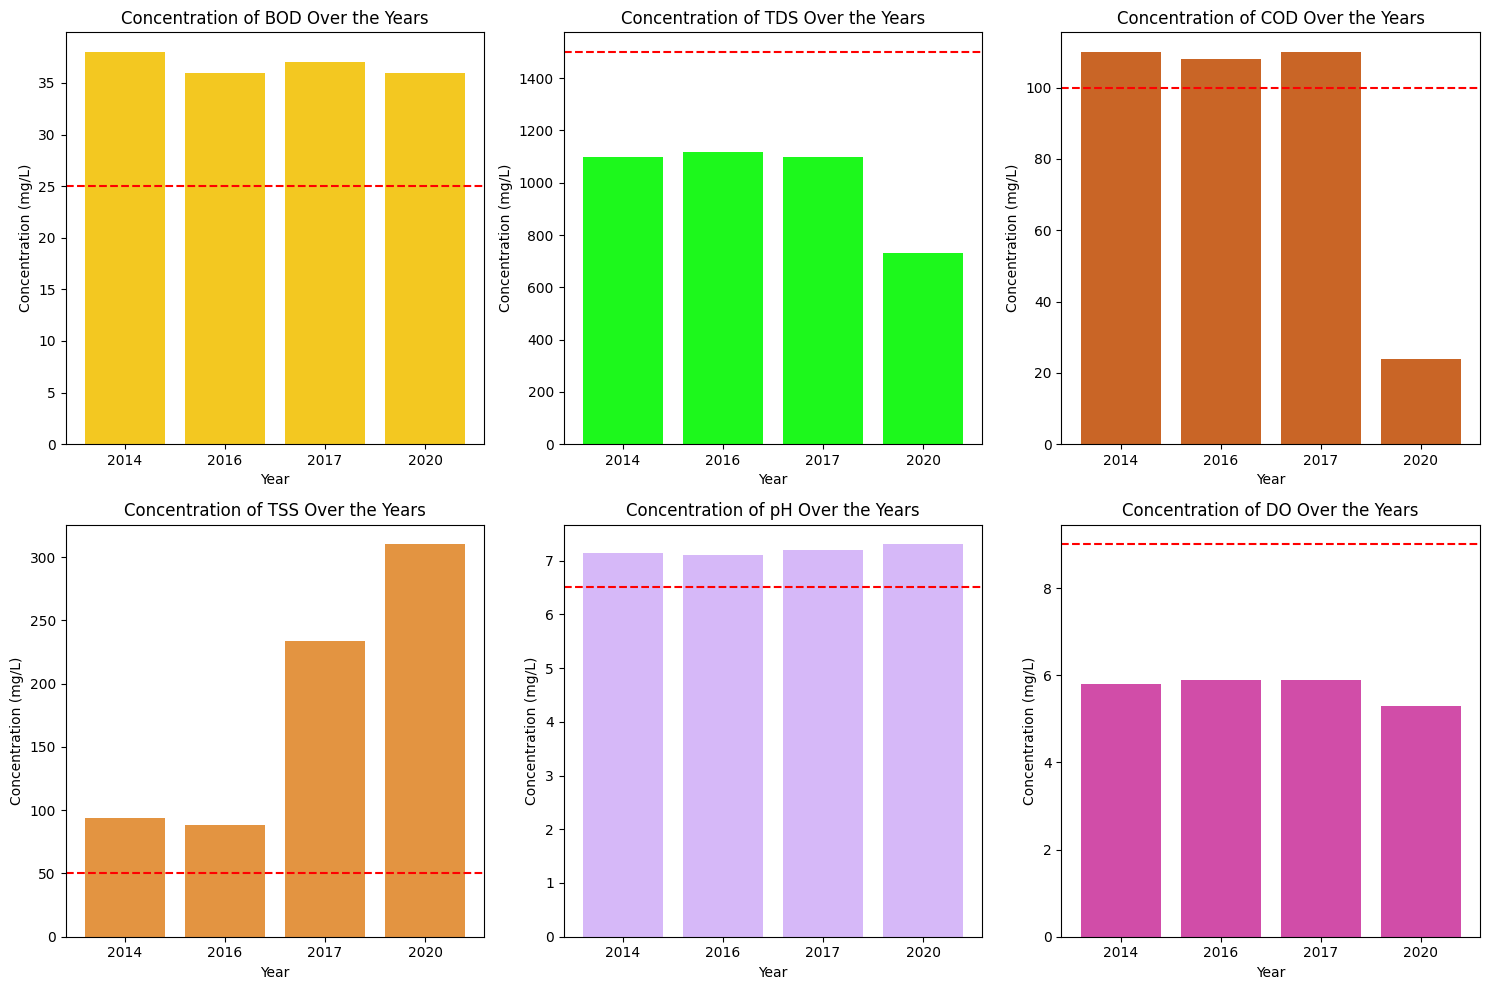

In [2]:
parameters_to_plot = ["BOD", "TDS", "COD", "TSS", "pH", "DO"]
permissible_limits = {
    "BOD": 25,
    "TDS": 1500,
    "COD": 100,
    "TSS": 50,
    "pH": 6.5,
    "DO": 9
}
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, param in enumerate(parameters_to_plot):
    ax = axs[i]
    color = np.random.rand(3,)  # Generating a random color
    ax.bar(df.columns[1:], df.loc[df['Parameters'] == param].values[0][1:], color=color)
    ax.set_title(f'Concentration of {param} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Concentration (mg/L)')
    ax.set_xticks(df.columns[1:])
    permissible_limit = permissible_limits[param]
    # draw a horizontal line at the permissible limit
    ax.axhline(y=permissible_limit, color='red', linestyle='--')
for ax in axs[len(parameters_to_plot):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
df = pd.read_csv("Data/Musi_year_wise.csv")
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
def clean_value(x):
    if isinstance(x, str) and x.startswith('<'):
        return float(x[1:])
    return float(x)
for col in df.columns[1:]:
    df[col] = df[col].apply(clean_value)
# print(df)

features = df.columns[1:]

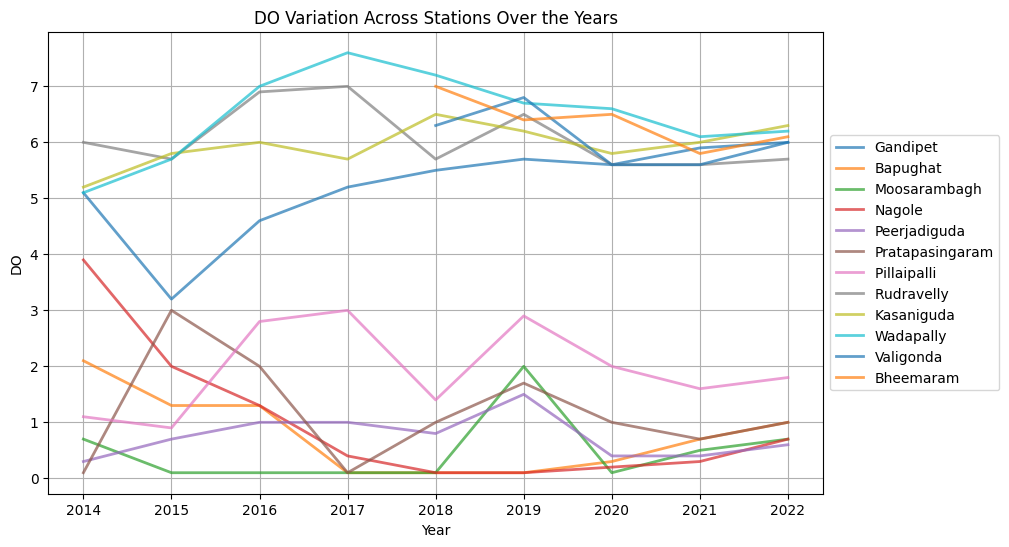

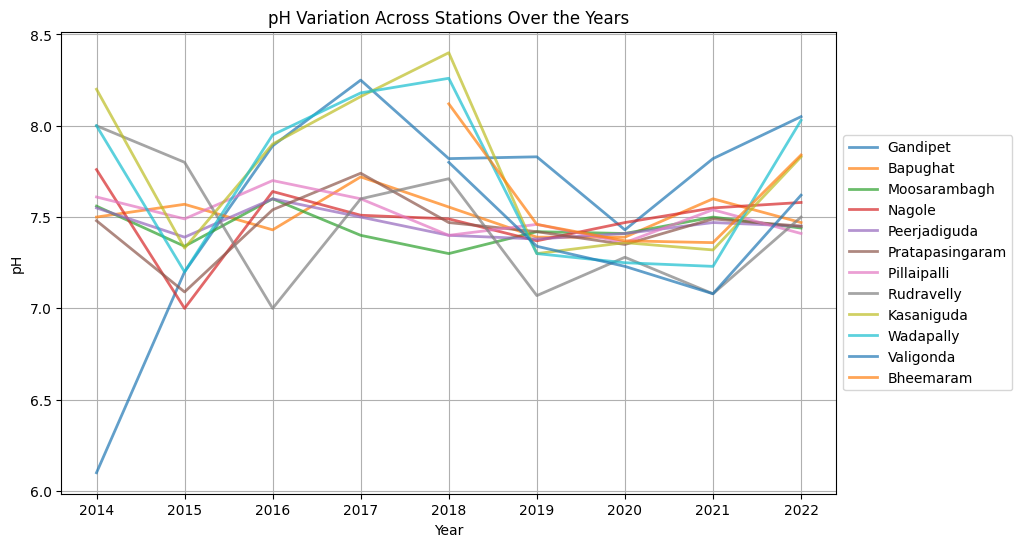

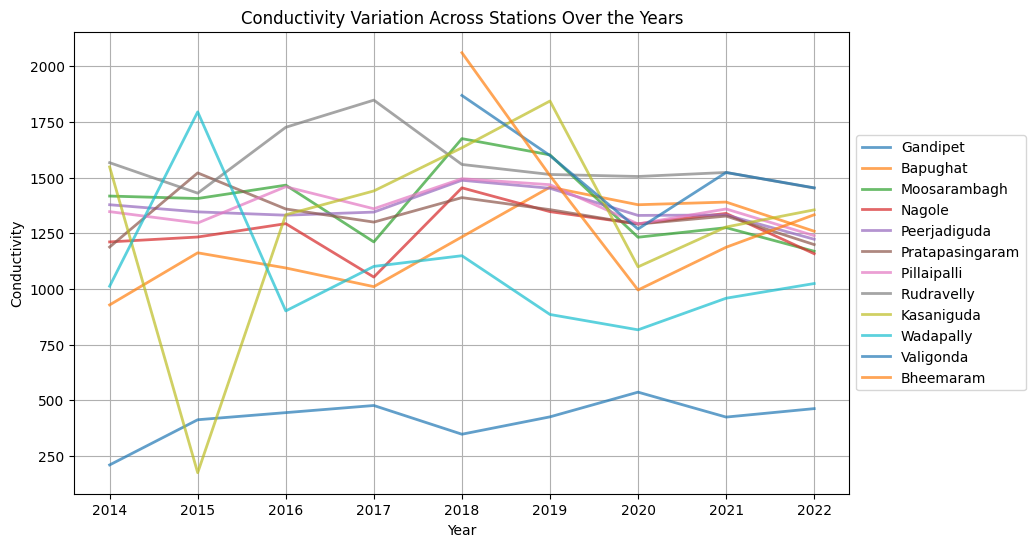

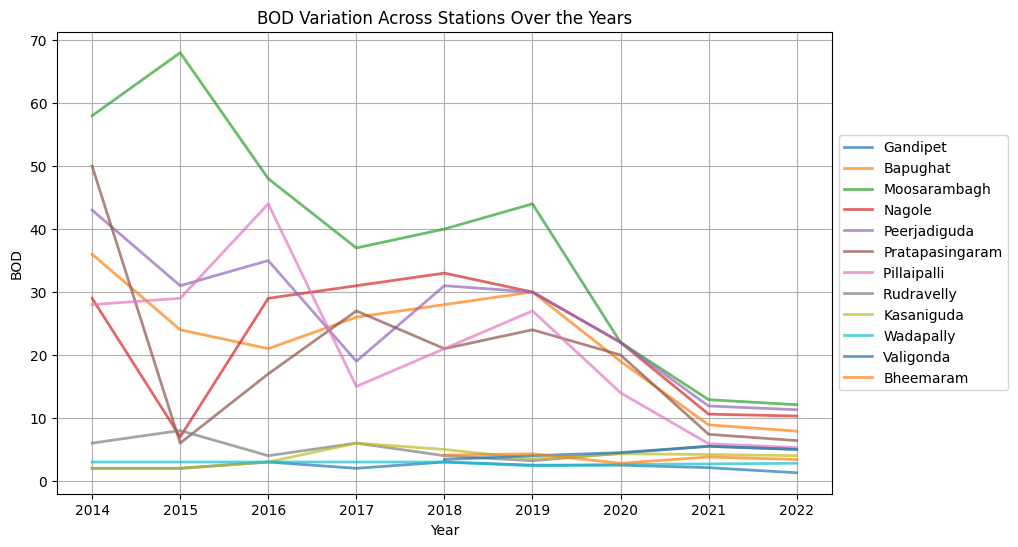

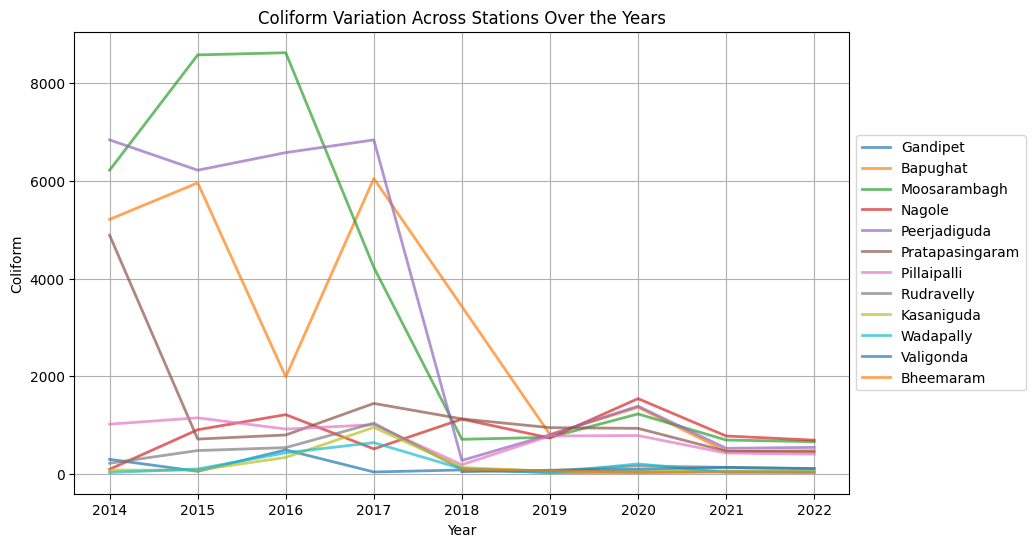

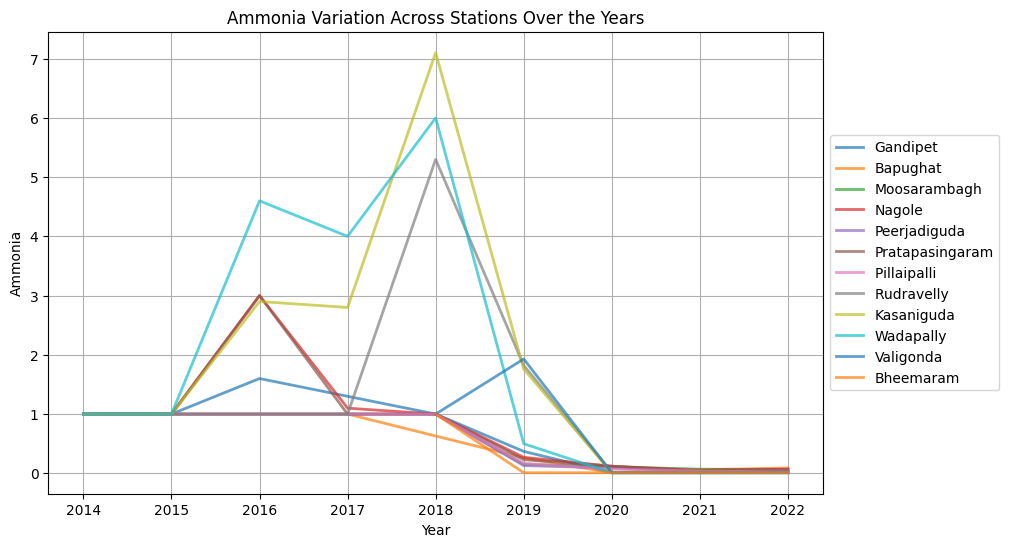

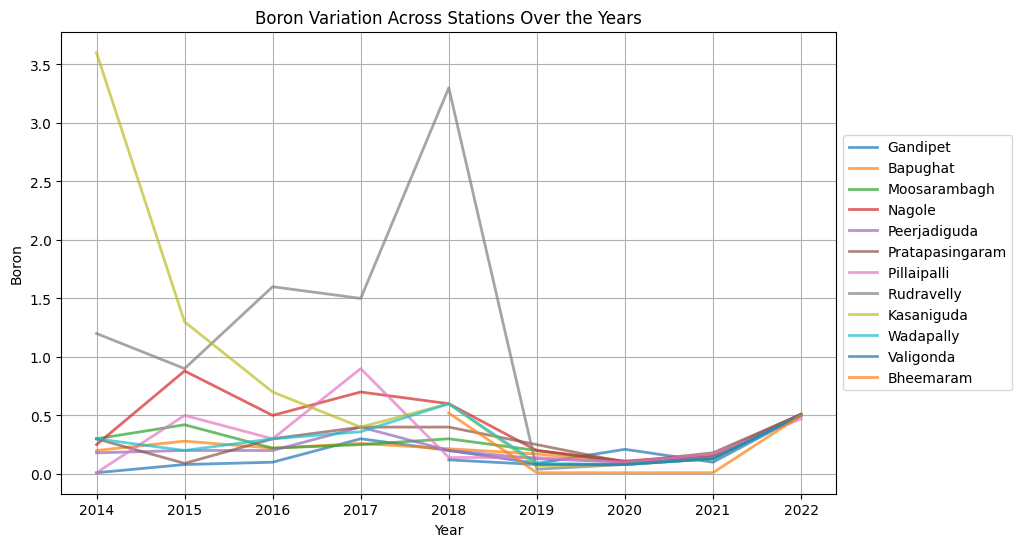

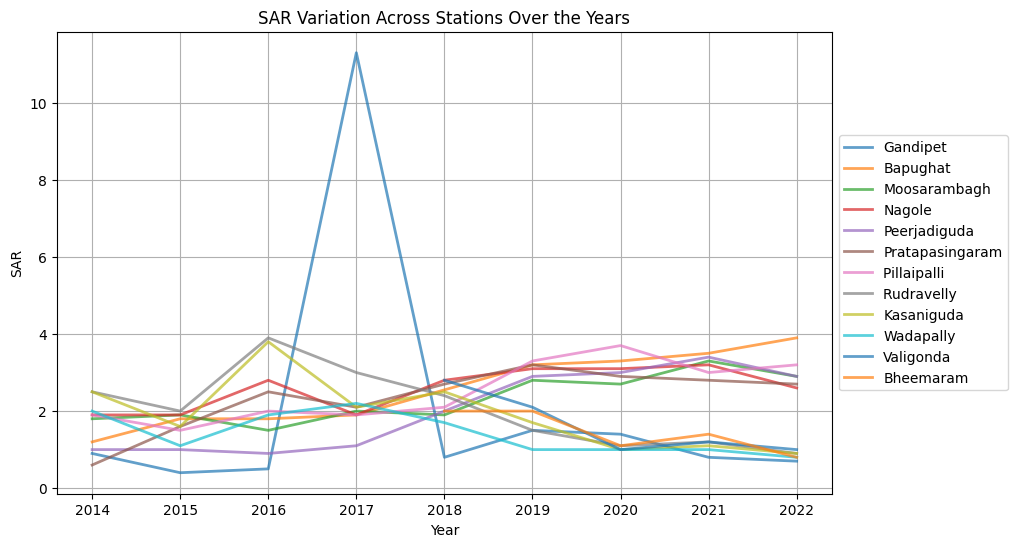

In [4]:
for feature in features:
    if feature == 'Year':
        continue
    plt.figure(figsize=(10, 6))
    for station in df['Station Name'].unique():
        station_data = df[df['Station Name'] == station]
        plt.plot(station_data['Year'], station_data[feature], label=station, linewidth=2, alpha=0.7)
    plt.title(f'{feature} Variation Across Stations Over the Years')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()
